In [181]:
from copy import deepcopy
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

a,bは0.5～2m、dは0.6mくらい、rは15mmくらい

In [288]:
# const
r = 0.015
d = 0.6
a = 1.5
b = 1.9

In [289]:
def terminal_trajectory(th, r, l, d):
    """
    th: angle [rad]
    r: pulley raidus [m]
    l: wire length [m]
    d: x-axis offset [m]
    """
    x = (l - r * th) * np.cos(th) + r * np.sin(th) - d
    y = (l - r * th) * np.sin(th) - r * np.cos(th)
    return np.array([x, y])

<IPython.core.display.Javascript object>


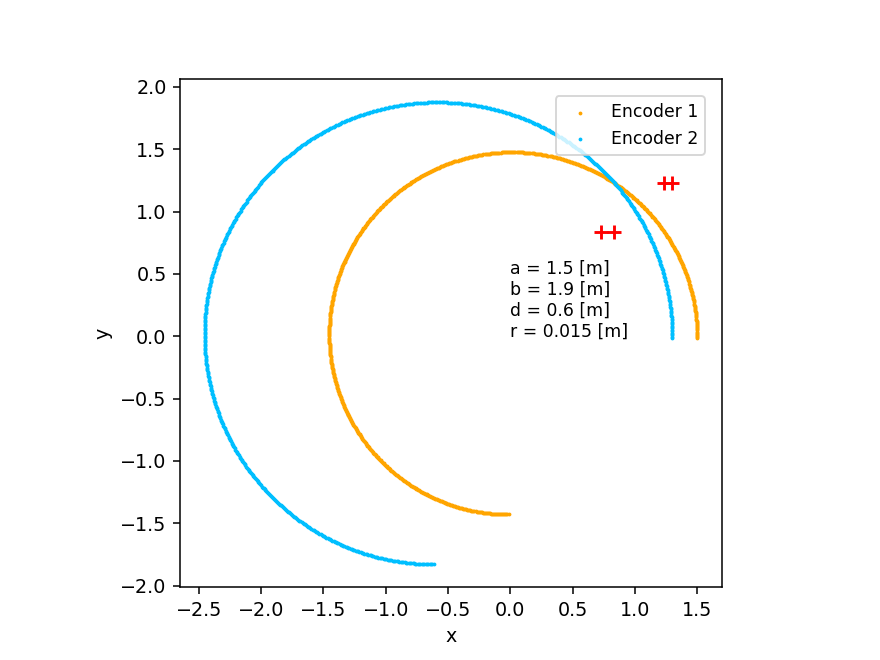

In [290]:
df = pd.DataFrame()
# theta [rad]
dt = np.pi / (180*3)
df['theta'] = np.arange(0, 1.5*np.pi + dt, dt)
# x1, y1
f1 = terminal_trajectory(df.theta, r, a, 0)
df['x1'] = f1[0]
df['y1'] = f1[1]
# x2, y2
f2 = terminal_trajectory(df.theta, r, b, d)
df['x2'] = f2[0]
df['y2'] = f2[1]
# check
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')
ax1.scatter(df.x1, df.y1, s=1, c='orange', label='Encoder 1')
ax1.scatter(df.x2, df.y2, s=1, c='deepskyblue', label='Encoder 2')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
comment = "a = %s [m]\nb = %s [m]\nd = %s [m]\nr = %s [m]" % (a, b, d, r)
ax1.text(0, 0, comment, size=9, c="black")
ax1.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=9)
#fig.savefig("a=%s[m]b=%s[m]d=%s[m]r=%s[m].png" % (a, b, d, r))

#ax2 = fig.add_subplot(312)
#ax2.set_aspect('equal')
#ax2.scatter(df.theta, df.x1 - df.x2, s=1, c='orange', label='fx')
#ax2.scatter(df.theta, df.y1 - df.y2, s=1, c='purple', label='fy')
#ax2.set_xlabel('theta')
#ax2.set_ylabel('fx, fy')


plt.show()

In [291]:
df

,theta,x1,y1,x2,y2
0,0.000000,1.500000,-0.015000,1.300000,-0.015000
1,0.005818,1.499975,-0.006274,1.299968,-0.003947
2,0.011636,1.499898,0.002452,1.299871,0.007106
3,0.017453,1.499772,0.011176,1.299711,0.018157
4,0.023271,1.499594,0.019899,1.299486,0.029207
...,...,...,...,...,...
806,4.689118,-0.048263,-1.428927,-0.657570,-1.828819
807,4.694936,-0.039947,-1.429096,-0.646928,-1.829036
808,4.700753,-0.031631,-1.429217,-0.636286,-1.829190
809,4.706571,-0.023316,-1.429290,-0.625643,-1.829283


In [292]:
def fx_fy(theta_phi):
    (th, ph) = theta_phi
    (x1, y1) = terminal_trajectory(th, r, a, 0)
    (x2, y2) = terminal_trajectory(ph, r, b, d)
    fx = x1 - x2
    fy = y1 - y2
    return np.array([fx, fy])

In [293]:
def jacobian(theta_phi):
    (th, ph) = theta_phi
    a_ = a - r * th
    b_ = b - r * ph
    J11 = -a_ * np.sin(th)
    J12 = b_ * np.sin(ph)
    J21 = a_ * np.cos(th)
    J22 = -b_ * np.cos(ph)
    return np.array([[J11, J12], [J21, J22]])

In [294]:
# newton method
#theta_phi = np.array([np.pi/4, 2*np.pi/4])
#theta_phi = np.array([np.pi/6, np.pi/2])
theta_phi = np.array([0.25*np.pi, 0.3*np.pi])
delta = np.array([1e3, 1e3])
i = 0
points = []
while(abs(delta)[0] > 1e-3 or abs(delta)[1] > 1e-3):
    try:
        J = jacobian(theta_phi)
        delta = np.dot(np.linalg.inv(J), fx_fy(theta_phi))
        theta_phi = theta_phi - delta
    except:
        theta_phi = np.array([np.nan, np.nan])        

    p1 = terminal_trajectory(theta_phi[0], r, a, 0)
    points.append(p1)
    print(i, delta, theta_phi, p1)
    
    i = i + 1
    if (i > 30):
        print('not convergence')
        break

0 [-0.28195511  0.1609817 ] [1.06735328 0.78149609] [0.7290812 1.2926295]
1 [0.08211552 0.06379088] [0.98523776 0.71770521] [0.83333093 1.22949879]
2 [0.0022736  0.00248545] [0.98296416 0.71521976] [0.83614308 1.22762933]
3 [-5.45923705e-06 -3.60821646e-06] [0.98296961 0.71522337] [0.83613633 1.22763382]


In [295]:
# add solutions to plot
px=np.array(points).reshape([2,len(points)])[0]
py=np.array(points).reshape([2,len(points)])[1]
#index=list(map(lambda x: '$%s$' % x, range(len(points))))
ax1.scatter(px, py, s=50, marker='+', c='red', label='solution')
#ax1.scatter(px+0.1, py, s=100, marker=index, c='gray', label='solution')